<a href="https://colab.research.google.com/github/Aathityan-K/Machine_learning_projects/blob/main/Decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
link = "https://raw.githubusercontent.com/Aathityan-K/Machine_learning_projects/main/winequality-white.csv"
data = pd.read_csv(link)
data.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6
1,6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9...
2,8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;1...
3,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...
4,7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4...


In [4]:
df = pd.read_csv(link, names=['fixed_acidity','volatile_acidity', 'citric_acid','residual_suagr',
                              'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide','density',
                              'pH', 'sulphates', 'alcohol', 'quality'],
                 skiprows=1,
                 sep=r'\s*;\s*',
                 engine='python')
#new column names are hard coded and skiprows is used to ignore the wrong format column names
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_suagr,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


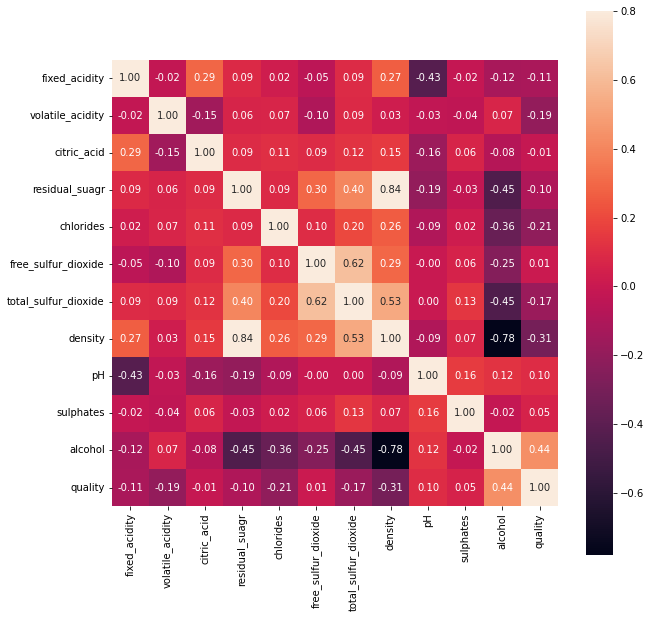

In [7]:
corr = df.corr()
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, vmax=.8,square=True, annot=True, fmt='.2f')
plt.show()

In [15]:
x = df[['free_sulfur_dioxide', 'pH', 'sulphates', 'alcohol']]
y = df['quality']

In [26]:
X = df.drop('quality', axis=1)
y = df['quality']

In [16]:
y.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [33]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier()

In [34]:
score = classifier.score(x_test, y_test)
print(score)

0.5408163265306123


In [35]:
classifier.feature_importances_

array([0.27081584, 0.27012614, 0.2387443 , 0.22031371])

In [38]:
import sklearn.tree as tree

tree.export_graphviz(classifier, out_file='tree.dot', feature_names=x.columns)

In [39]:
from subprocess import call
call(['dot', '-T', 'png', 'tree.dot', '-o', 'tree.png'])

0